In [1]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
X,y = make_classification(n_samples=20000, n_features=10)

In [3]:
X

array([[-1.04566172,  0.71930238,  0.99695033, ...,  1.87960599,
         0.30111125,  2.04816698],
       [ 0.88319619, -0.39937569,  0.63725711, ...,  0.82090139,
        -0.63614508,  1.62066297],
       [-1.40838208, -0.9491267 ,  1.30775051, ...,  0.44337034,
        -0.4612077 , -0.44818266],
       ...,
       [-1.2006237 , -2.2965707 ,  0.28758314, ...,  0.91805745,
         0.14773821,  0.10572323],
       [ 1.07548566, -0.14597725, -1.41642829, ..., -0.10339115,
         0.28696226, -0.86198753],
       [ 1.07904589,  1.222886  ,  0.82298312, ...,  0.32559227,
         0.40975426, -0.15990658]])

In [4]:
y

array([0, 0, 1, ..., 1, 1, 1])

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


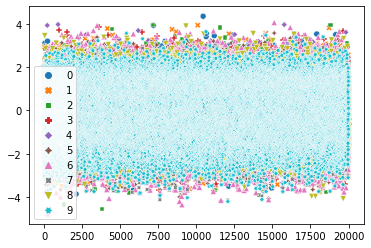

In [5]:
sns.scatterplot(data=X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=48)

In [7]:
 # Sinlge logistic regression on model
 from sklearn.metrics import accuracy_score
 lr = LogisticRegression()
 lr.fit(X_train, y_train)
 y_pred = lr.predict(X_test)
 print("Accuracy of logistic regression model is", accuracy_score(y_test, y_pred))

Accuracy of logistic regression model is 0.893


In [8]:
# Sinlge logistic regression on model
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy of Decision tree model is", accuracy_score(y_test, y_pred))

Accuracy of Decision tree model is 0.89475


**BAGGING with Decision Tree**

In [9]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=400,
    max_samples=0.2,
    bootstrap=True
)

In [10]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.2,
                  n_estimators=400)

In [11]:
y_pred = bag.predict(X_test)

In [12]:
print("Accuracy of Bagging model is", accuracy_score(y_test, y_pred))

Accuracy of Bagging model is 0.93725


In [ ]:
bag.estimators_samples_

In [14]:
bag.estimators_samples_[0].shape

(3200,)

In [15]:
# same as we are using row sampling
bag.estimators_features_[0].shape

(10,)

BAGGING with Logistic Regression

In [16]:
bag = BaggingClassifier(
    base_estimator=LogisticRegression(),
    n_estimators=800,
    max_samples=0.4,
    bootstrap=True
)

In [17]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), max_samples=0.4,
                  n_estimators=800)

In [18]:
y_pred = bag.predict(X_test)

In [19]:
print("Accuracy of Bagging model is", accuracy_score(y_test, y_pred))

Accuracy of Bagging model is 0.893


Random Subspaces with Column Subsampling

In [20]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=400,
    max_samples=1.0,
    max_features=0.5,
    bootstrap=True
)

In [21]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  n_estimators=400)

In [22]:
y_pred = bag.predict(X_test)

In [23]:
print("Accuracy of Bagging model with column sampling is", accuracy_score(y_test, y_pred))

Accuracy of Bagging model with column sampling is 0.93675


In [24]:
bag.estimators_features_[0].shape

(5,)

**Random patches with both row and column sampling**

In [40]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=400,
    max_samples=0.4,
    max_features=0.5,
    bootstrap=True,
    oob_score=True
)

In [41]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.4, n_estimators=400, oob_score=True)

In [42]:
y_pred = bag.predict(X_test)

In [43]:
print("Accuracy of Bagging model with Random patches is", accuracy_score(y_test, y_pred))

Accuracy of Bagging model with Random patches is 0.93525


In [44]:
bag.oob_score_

0.9331875

**RandomSearchCV**

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
params = {
    'n_estimators' : [200, 400, 600],
    'max_samples' : [0.2, 0.6, 1.0],
    'max_features' : [0.2, 0.6, 1.0],
    'bootstrap': [True, False] 
}

In [31]:
random_cv = RandomizedSearchCV(BaggingClassifier(), params, cv=4)

In [32]:
random_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=BaggingClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.2, 0.6, 1.0],
                                        'n_estimators': [200, 400, 600]})

In [33]:
random_cv.best_params_

{'n_estimators': 200,
 'max_samples': 0.6,
 'max_features': 0.6,
 'bootstrap': True}

In [34]:
y_pred = random_cv.predict(X_test)

In [35]:
print("Accuracy of Bagging model with Random patches is", accuracy_score(y_test, y_pred))

Accuracy of Bagging model with Random patches is 0.938
